✅ Loaded 2313810 rows and 78 columns


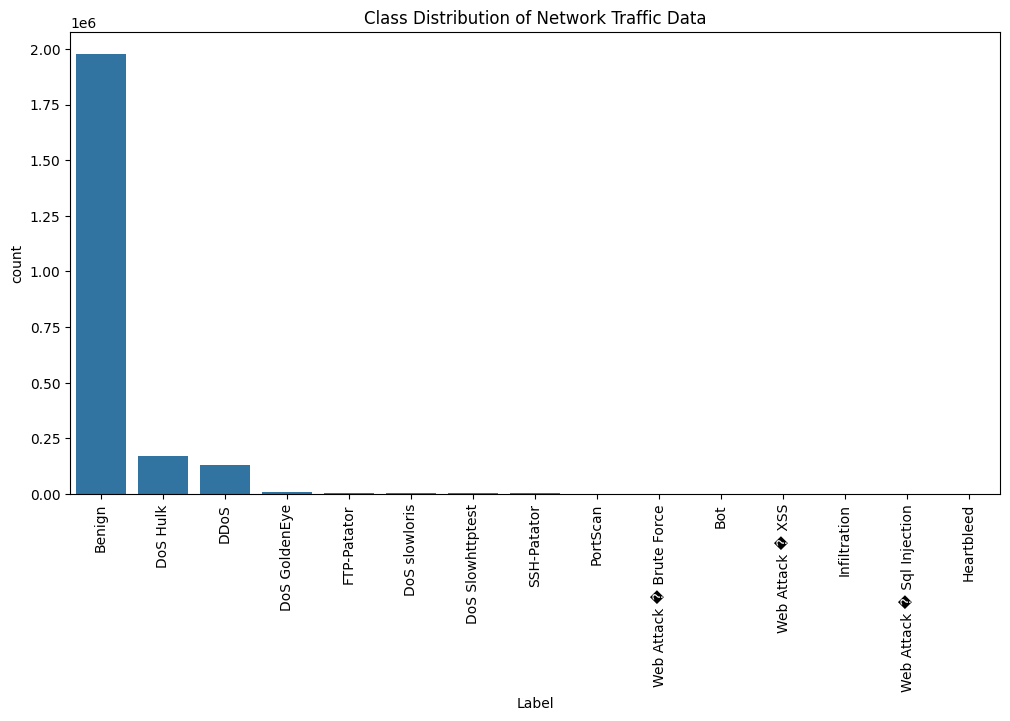

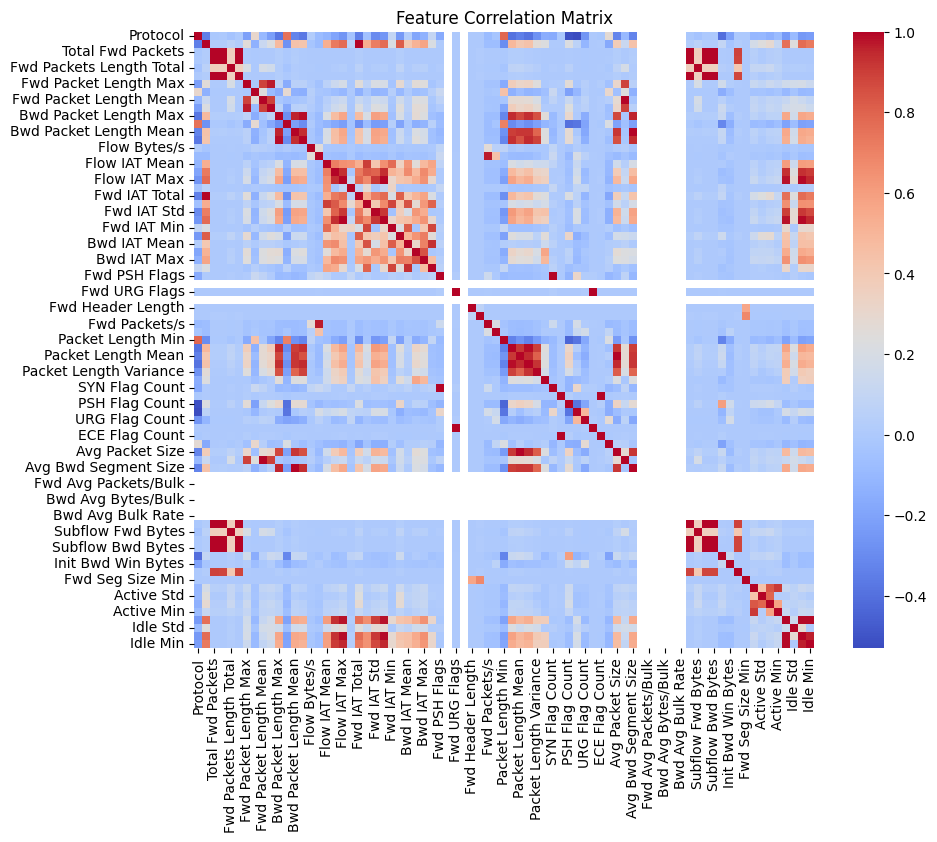

Feature Summary Statistics:
           Protocol  Flow Duration  Total Fwd Packets  Total Backward Packets  \
count  2.313810e+06   2.313810e+06       2.313810e+06            2.313810e+06   
mean   1.050673e+01   1.807575e+07       1.108391e+01            1.255334e+01   
std    5.416040e+00   3.640823e+07       8.291879e+02            1.103179e+03   
min    0.000000e+00  -1.300000e+01       1.000000e+00            0.000000e+00   
25%    6.000000e+00   4.760000e+02       2.000000e+00            1.000000e+00   
50%    6.000000e+00   6.478300e+04       2.000000e+00            2.000000e+00   
75%    1.700000e+01   5.856948e+06       6.000000e+00            5.000000e+00   
max    1.700000e+01   1.200000e+08       2.197590e+05            2.919220e+05   

       Fwd Packets Length Total  Bwd Packets Length Total  \
count              2.313810e+06              2.313810e+06   
mean               6.664045e+02              1.976976e+04   
std                1.105009e+04              2.503141e+06  

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 📌 Load Dataset
DATA_PATH = os.path.join("..", "data")
parquet_files = [os.path.join(DATA_PATH, f) for f in os.listdir(DATA_PATH) if f.endswith(".parquet")]

df_list = [pd.read_parquet(file, engine='pyarrow') for file in parquet_files]
df = pd.concat(df_list, ignore_index=True)
print(f"✅ Loaded {df.shape[0]} rows and {df.shape[1]} columns")

# 📌 Show Class Distribution
plt.figure(figsize=(12, 6))
sns.countplot(x=df['Label'], order=df['Label'].value_counts().index)
plt.xticks(rotation=90)
plt.title("Class Distribution of Network Traffic Data")
plt.show()

# 📌 Show Correlation Matrix
plt.figure(figsize=(10, 8))

# Remove non-numeric columns before computing correlation
df_numeric = df.select_dtypes(include=[np.number])

corr = df_numeric.corr()  # Compute correlation on numeric data only
sns.heatmap(corr, cmap="coolwarm", annot=False)
plt.title("Feature Correlation Matrix")
plt.show()


# 📌 Display Basic Statistics
print("Feature Summary Statistics:")
print(df.describe())

